<a href="https://www.kaggle.com/code/keerthi4701/mini-course?scriptVersionId=138818033" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Import dataset and libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # visualizatin
import datetime
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/playground-series-s3e19/sample_submission.csv
/kaggle/input/playground-series-s3e19/train.csv
/kaggle/input/playground-series-s3e19/test.csv


In [2]:
sample = pd.read_csv('/kaggle/input/playground-series-s3e19/sample_submission.csv')
train = pd.read_csv('/kaggle/input/playground-series-s3e19/train.csv',index_col='id')
test = pd.read_csv('/kaggle/input/playground-series-s3e19/test.csv',index_col='id')

In [3]:
def view(dataframe):
    
    print("shape : ",dataframe.shape)  # dimension of dataset
    
    display(dataframe[:3]) # head()
    
    print('\n',dataframe.info()) 
    
    display(dataframe.describe(include = 'all').T)

In [4]:
view(train)

shape :  (136950, 5)


,date,country,store,product,num_sold
id,,,,,
0,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding,63
1,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Train More LLMs,66
2,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People,9


<class 'pandas.core.frame.DataFrame'>
Int64Index: 136950 entries, 0 to 136949
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   date      136950 non-null  object
 1   country   136950 non-null  object
 2   store     136950 non-null  object
 3   product   136950 non-null  object
 4   num_sold  136950 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 6.3+ MB

 None


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
date,136950,1826,2017-01-01,75,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,136950,5,Argentina,27390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
store,136950,3,Kaggle Learn,45650,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product,136950,5,Using LLMs to Improve Your Coding,27390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
num_sold,136950.0,NaN,NaN,NaN,165.522636,183.691575,2.0,46.0,98.0,184.0,1380.0


In [5]:
train.date = train.date.astype('datetime64')
test.date = test.date.astype('datetime64')
month = train['date'].dt.month
day = train['date'].dt.day

# EDA

In [6]:
train.duplicated().sum()

0

In [7]:
train.isnull().sum()

date        0
country     0
store       0
product     0
num_sold    0
dtype: int64

In [8]:
train.store.value_counts()

Kaggle Learn    45650
Kaggle Store    45650
Kagglazon       45650
Name: store, dtype: int64

In [9]:
train.country.value_counts()

Argentina    27390
Canada       27390
Estonia      27390
Japan        27390
Spain        27390
Name: country, dtype: int64

In [10]:
train['product'].value_counts()

Using LLMs to Improve Your Coding                 27390
Using LLMs to Train More LLMs                     27390
Using LLMs to Win Friends and Influence People    27390
Using LLMs to Win More Kaggle Competitions        27390
Using LLMs to Write Better                        27390
Name: product, dtype: int64

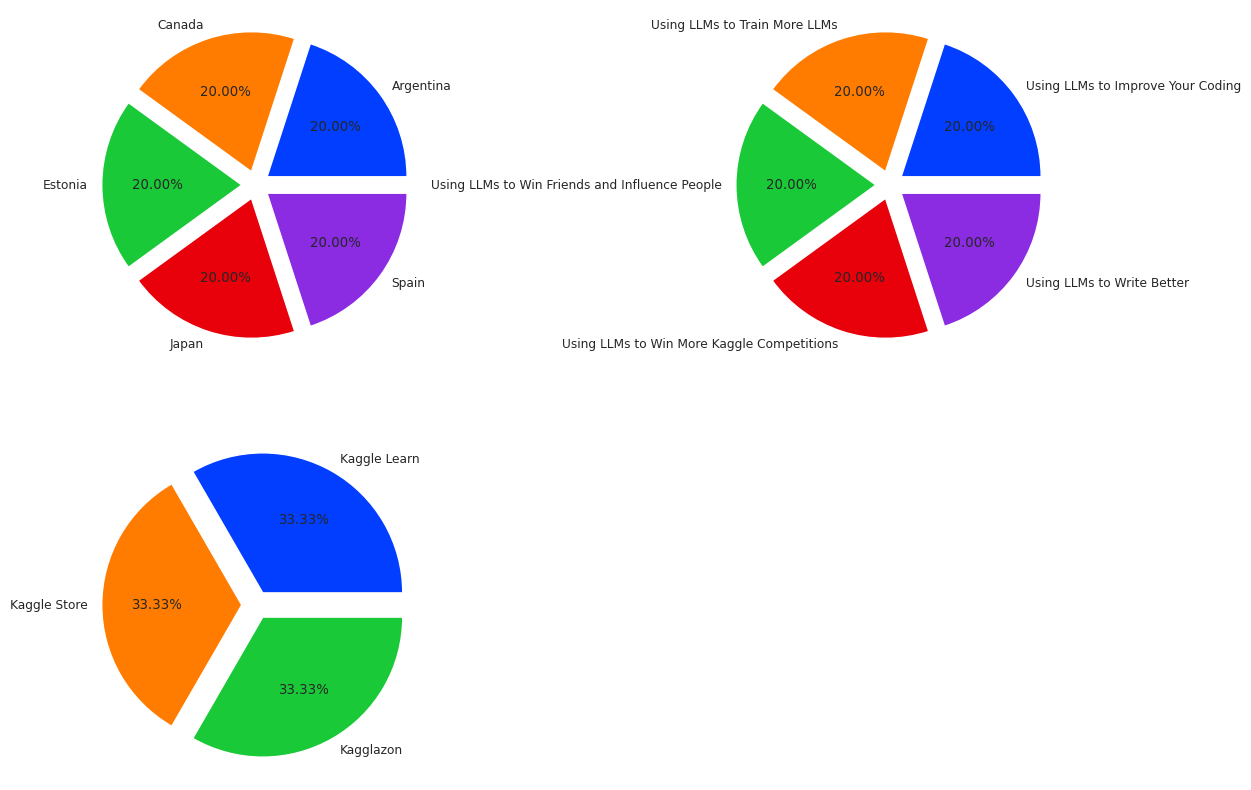

In [11]:
plt.figure(figsize=(15,10))
sns.set(font_scale=0.8,palette='bright')
explode = [0.1,0.1,0.1,0.1,0.1]

plt.subplot(2,2,1)
plt.pie(train.country.value_counts().values, labels=train.country.unique(),autopct='%.2f%%',explode = explode)

plt.subplot(2,2,3)
plt.pie(train.store.value_counts().values, labels=train.store.unique(),autopct='%.2f%%',explode = explode[:3])

plt.subplot(2,2,2)
plt.pie(train['product'].value_counts().values, labels=train['product'].unique(),autopct='%.2f%%',explode = explode)
plt.show()

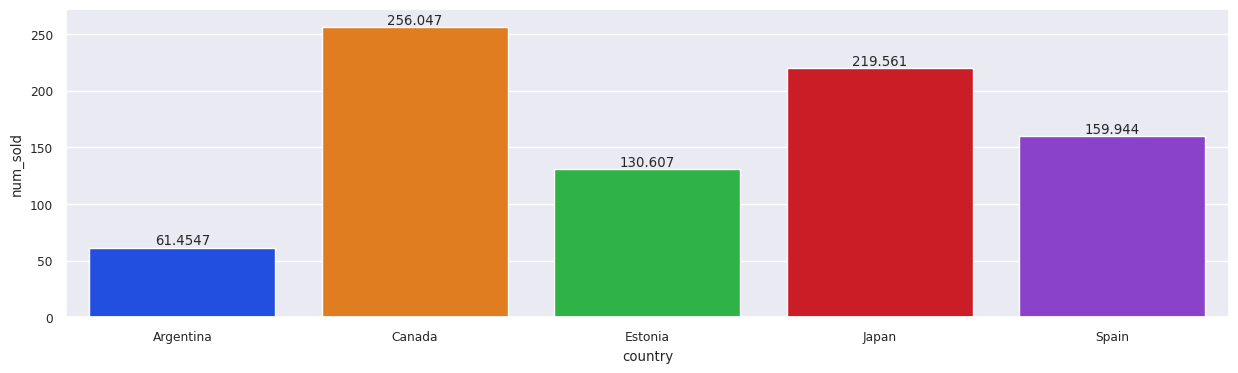

In [12]:
plt.figure(figsize=(15,4))
ax = sns.barplot(data = train, x='country', y='num_sold',errwidth=0)
ax.bar_label(ax.containers[0])
plt.show()

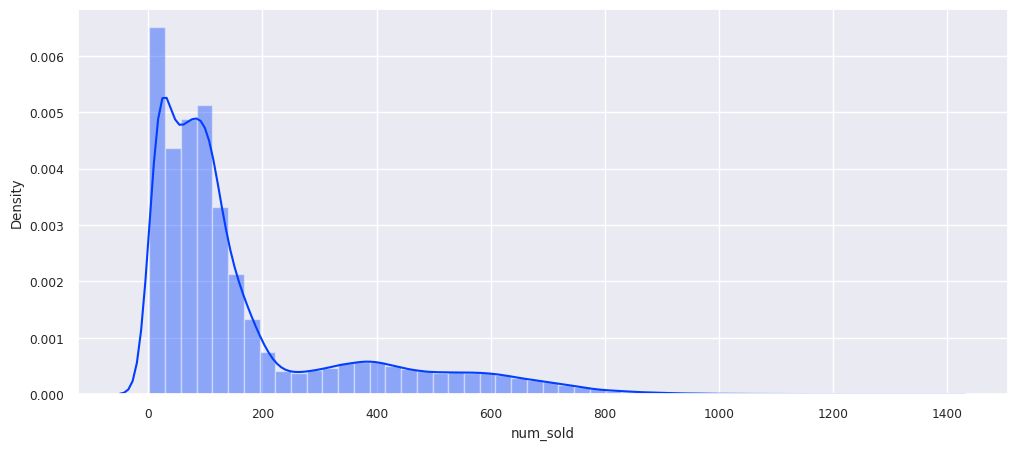

In [13]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.distplot(train.num_sold)
plt.show()

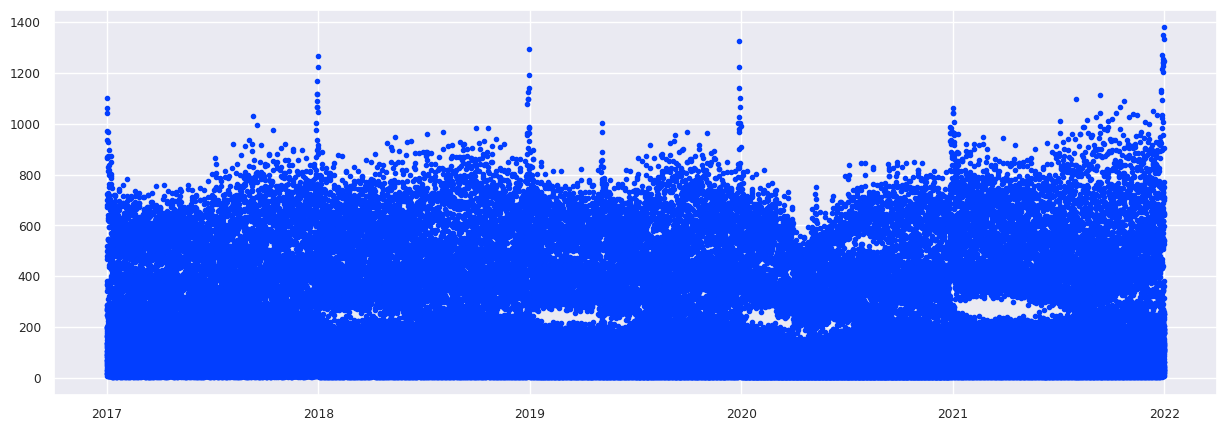

In [14]:
fig, ax = plt.subplots(figsize=(15, 5))
plt.scatter(x = train.date, y=train.num_sold ,marker= '.')
plt.show()

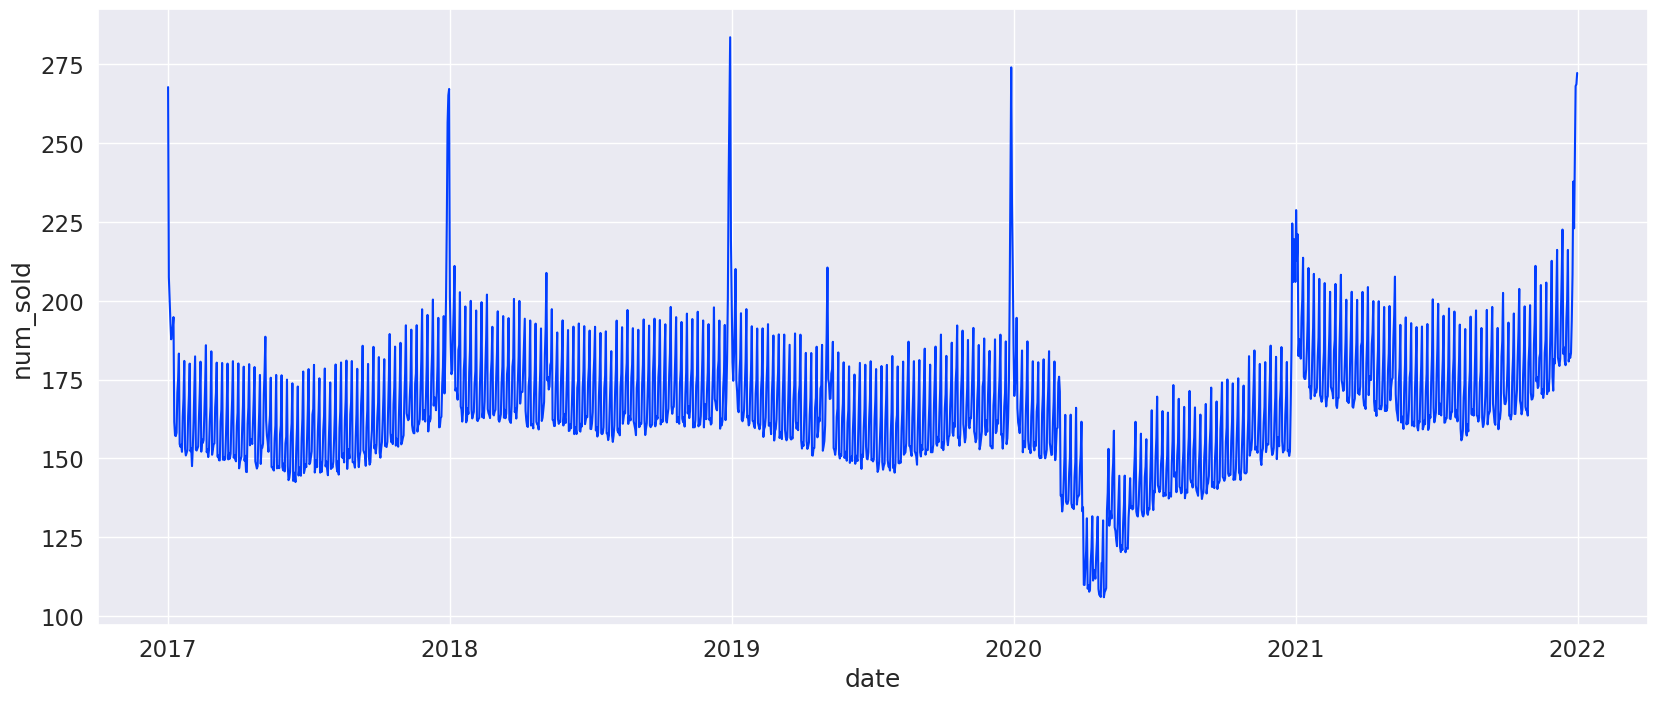

In [15]:
sns.set(font_scale=1.5,palette='bright')
fig,ax=plt.subplots(1,1,figsize=(20,8))
sns.lineplot(x=train['date'], y=train['num_sold'], ax=ax, errorbar=None)
plt.show()

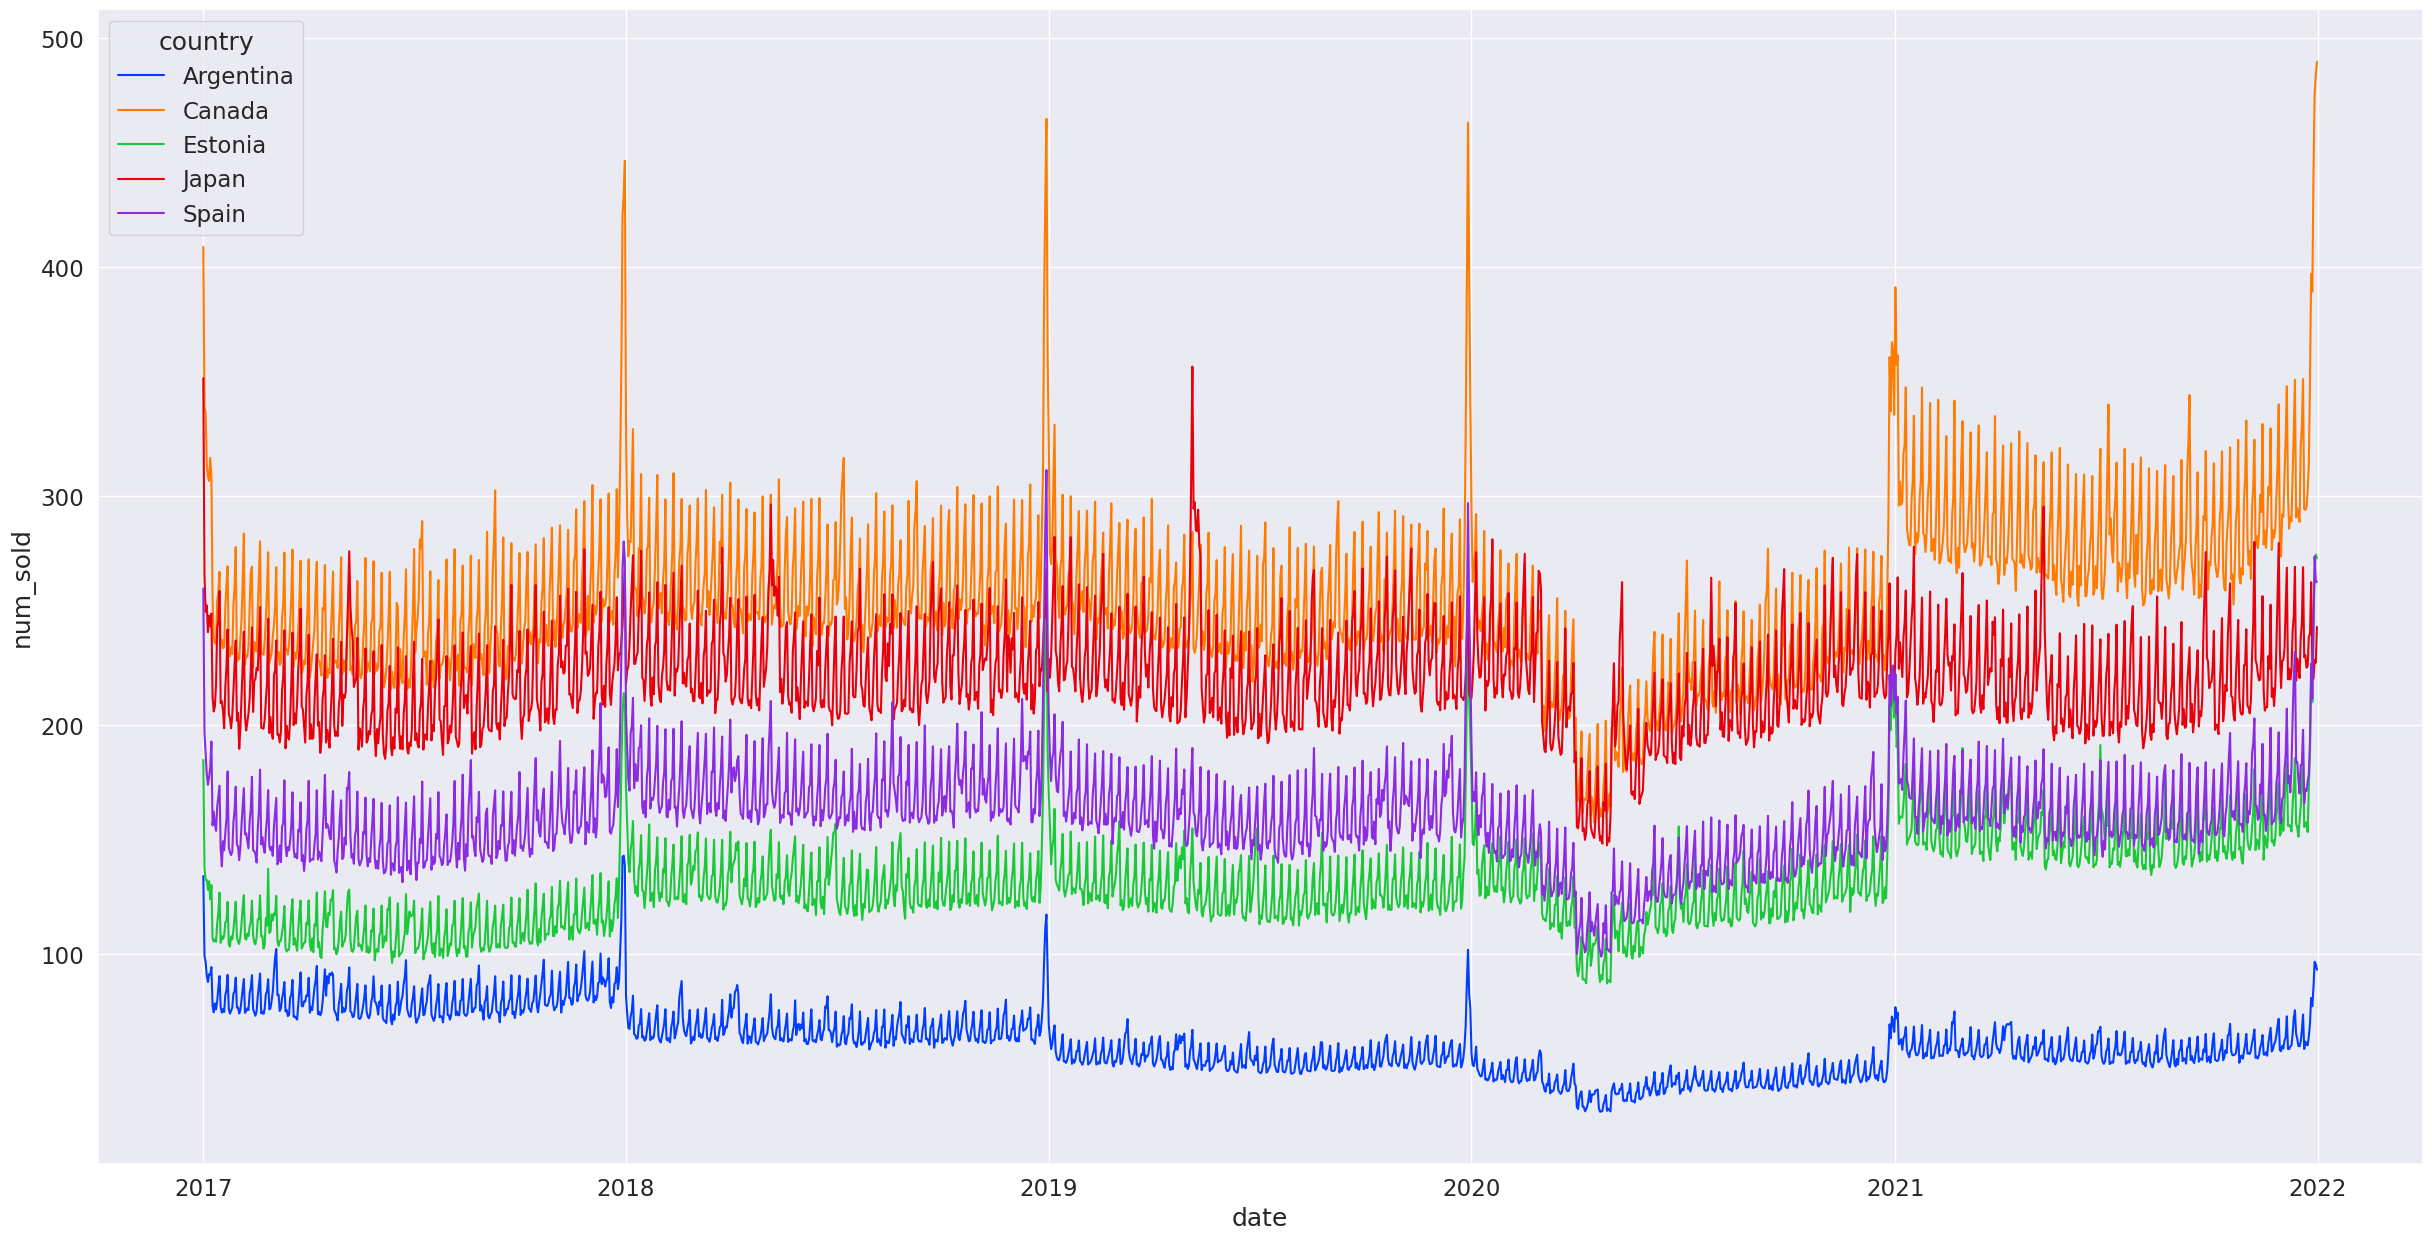

In [16]:
fig,ax=plt.subplots(1,1,figsize=(30,15))
sns.lineplot(x=train['date'], y=train['num_sold'], hue=train['country'], ax=ax, errorbar=None)
plt.show()

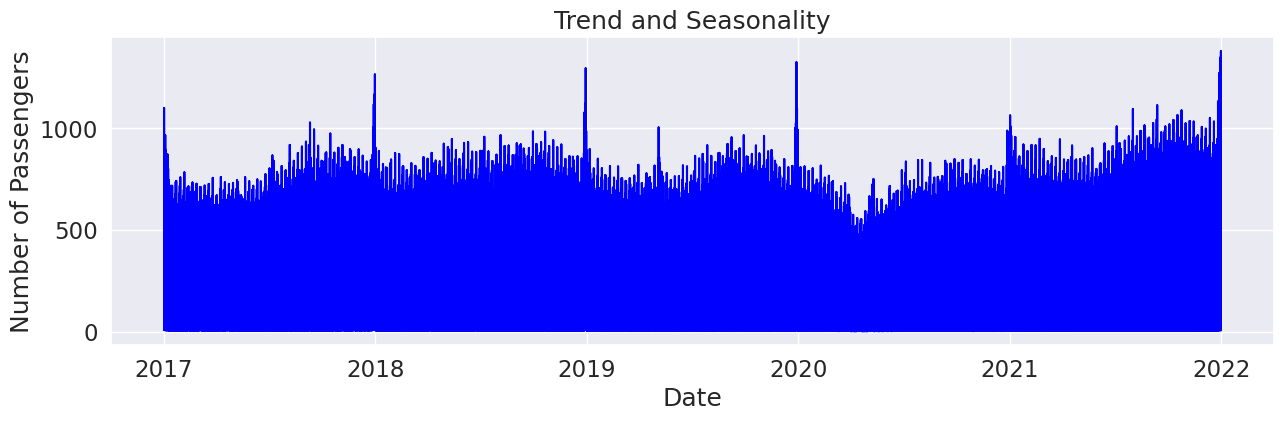

In [17]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Number of Passengers', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='blue')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    

plot_df(train, x=train['date'], y=train['num_sold'], title='Trend and Seasonality')

# Feature Engineering


In [18]:
train.describe()

,num_sold
count,136950.000000
mean,165.522636
std,183.691575
min,2.000000
25%,46.000000
50%,98.000000
75%,184.000000
max,1380.000000


In [19]:
train.columns

Index(['date', 'country', 'store', 'product', 'num_sold'], dtype='object')

In [20]:
train_copy = train.copy()
test_copy = test.copy()

In [21]:
train_copy.head()

,date,country,store,product,num_sold
id,,,,,
0,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding,63
1,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Train More LLMs,66
2,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People,9
3,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions,59
4,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Write Better,49


In [22]:
train.columns

Index(['date', 'country', 'store', 'product', 'num_sold'], dtype='object')

In [23]:
dummy = ['country','store','product']
dummies = pd.get_dummies(train[dummy], drop_first=True)
dummies[:3]
train_copy.drop(columns = dummy,inplace = True)
train_copy = train_copy.merge(dummies, left_on='id',right_on='id')


dummies = pd.get_dummies(test[dummy], drop_first=True)
dummies[:3]
test_copy.drop(columns = dummy,inplace = True)
test_copy = test_copy.merge(dummies, left_on='id',right_on='id')

In [24]:
## Extracting Features from Date column

train_copy['month'] = train_copy['date'].dt.month
train_copy['quarter'] = train_copy['date'].dt.quarter
train_copy['year'] = train_copy['date'].dt.year
train_copy['dayofweek'] = train_copy['date'].dt.dayofweek
train_copy['quarter'] = train_copy['date'].dt.quarter
train_copy['dayofmonth'] = train_copy['date'].dt.day
train_copy['weekofyear'] = train_copy['date'].dt.isocalendar().week 

test_copy['month'] = test_copy['date'].dt.month
test_copy['quarter'] = test_copy['date'].dt.quarter
test_copy['year'] = test_copy['date'].dt.year
test_copy['dayofweek'] = test_copy['date'].dt.dayofweek
test_copy['quarter'] = test_copy['date'].dt.quarter
test_copy['dayofmonth'] = test_copy['date'].dt.day
test_copy['weekofyear'] = test_copy['date'].dt.isocalendar().week

In [25]:
train_copy.drop('date',axis = 1,inplace =True)
test_copy.drop('date',axis = 1,inplace =True)

In [26]:
train_copy

,num_sold,country_Canada,country_Estonia,country_Japan,country_Spain,store_Kaggle Learn,store_Kaggle Store,product_Using LLMs to Train More LLMs,product_Using LLMs to Win Friends and Influence People,product_Using LLMs to Win More Kaggle Competitions,product_Using LLMs to Write Better,month,quarter,year,dayofweek,dayofmonth,weekofyear
id,,,,,,,,,,,,,,,,,
0,63,0,0,0,0,1,0,0,0,0,0,1,1,2017,6,1,52
1,66,0,0,0,0,1,0,1,0,0,0,1,1,2017,6,1,52
2,9,0,0,0,0,1,0,0,1,0,0,1,1,2017,6,1,52
3,59,0,0,0,0,1,0,0,0,1,0,1,1,2017,6,1,52
4,49,0,0,0,0,1,0,0,0,0,1,1,1,2017,6,1,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136945,700,0,0,0,1,0,0,0,0,0,0,12,4,2021,4,31,52
136946,752,0,0,0,1,0,0,1,0,0,0,12,4,2021,4,31,52
136947,111,0,0,0,1,0,0,0,1,0,0,12,4,2021,4,31,52


# Model

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import StratifiedKFold

In [28]:
X_train, X_test, y_train, y_test = train_test_split(train_copy.drop(columns='num_sold'), 
                                                    train_copy.num_sold, 
                                                    test_size= 0.2, 
                                                    )

In [29]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)
test = scalar.transform(test_copy)

In [30]:
X_train

array([[-0.49934388, -0.50091258,  1.99715215, ..., -1.49604577,
         1.73304409, -0.30470396],
       [ 2.00262793, -0.50091258, -0.50071298, ...,  1.00359241,
        -1.67221604, -0.30470396],
       [-0.49934388, -0.50091258, -0.50071298, ..., -0.99611814,
         0.82497472,  1.35454864],
       ...,
       [ 2.00262793, -0.50091258, -0.50071298, ...,  0.00373714,
         1.16550073,  1.42091875],
       [-0.49934388, -0.50091258, -0.50071298, ...,  0.50366477,
         0.93848339,  0.22625687],
       [-0.49934388, -0.50091258,  1.99715215, ..., -0.99611814,
        -1.67221604,  0.29262698]])

In [31]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((109560, 16), (27390, 16), (109560,), (27390,))

In [32]:
X_test

array([[-0.49934388, -0.50091258,  1.99715215, ...,  0.50366477,
        -1.44519869, -0.83566479],
       [-0.49934388, -0.50091258, -0.50071298, ...,  1.00359241,
         0.37094004, -0.43744417],
       [-0.49934388, -0.50091258, -0.50071298, ...,  0.00373714,
        -1.10467268, -0.23833386],
       ...,
       [ 2.00262793, -0.50091258, -0.50071298, ...,  0.50366477,
        -0.99116401,  0.6244775 ],
       [-0.49934388, -0.50091258, -0.50071298, ...,  0.00373714,
        -1.21818135,  0.29262698],
       [ 2.00262793, -0.50091258, -0.50071298, ...,  0.50366477,
         1.05199206,  0.82358781]])

In [33]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train,y_train)
y_pred = rf_model.predict(X_test)

In [34]:
y_pred = pd.DataFrame(y_pred)

In [35]:
from sklearn.metrics import mean_absolute_percentage_error

print(f"mean_absolute_percentage_error: {mean_absolute_percentage_error(y_test, y_pred)}\nr2_score: {r2_score(y_test,y_pred)}\nmean_squared_error: {mean_squared_error(y_test,y_pred)}")

mean_absolute_percentage_error: 0.05231144055710604
r2_score: 0.9926307734651223
mean_squared_error: 250.3944140963856


# Submission

In [36]:
predictions = rf_model.predict(test)
predictions = pd.DataFrame(predictions)
predictions

,0
0,36.51
1,36.59
2,5.05
3,36.41
4,25.79
...,...
27370,658.41
27371,678.75
27372,109.59
27373,626.73


In [37]:
sample['num_sold'] = predictions
sample

,id,num_sold
0,136950,36.51
1,136951,36.59
2,136952,5.05
3,136953,36.41
4,136954,25.79
...,...,...
27370,164320,658.41
27371,164321,678.75
27372,164322,109.59
27373,164323,626.73


In [38]:
sample.to_csv('predictions.csv',index=False)